In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [ ]:
# 目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x**2+x

# 数据集
np.random.seed(42)
x_train = np.linspace(-1, 1, 1000).reshape(-1, 1)
y_train = target_function(x_train)

x_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_test = target_function(x_test)

In [9]:
torch.manual_seed(42)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [10]:
class ReLUNetwork(nn.Module):
    def __init__(self):
        super(ReLUNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 50)
        self.output_layer = nn.Linear(50, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [ ]:

model = ReLUNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

#训练
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [100/10000], Loss: 0.006498
Epoch [200/10000], Loss: 0.000767
Epoch [300/10000], Loss: 0.000901
Epoch [400/10000], Loss: 0.001188
Epoch [500/10000], Loss: 0.000273
Epoch [600/10000], Loss: 0.002594
Epoch [700/10000], Loss: 0.000245
Epoch [800/10000], Loss: 0.000229
Epoch [900/10000], Loss: 0.000234
Epoch [1000/10000], Loss: 0.000208
Epoch [1100/10000], Loss: 0.000195
Epoch [1200/10000], Loss: 0.000210
Epoch [1300/10000], Loss: 0.000177
Epoch [1400/10000], Loss: 0.000166
Epoch [1500/10000], Loss: 0.000557
Epoch [1600/10000], Loss: 0.000152
Epoch [1700/10000], Loss: 0.000143
Epoch [1800/10000], Loss: 0.010215
Epoch [1900/10000], Loss: 0.000131
Epoch [2000/10000], Loss: 0.000123
Epoch [2100/10000], Loss: 0.000954
Epoch [2200/10000], Loss: 0.000121
Epoch [2300/10000], Loss: 0.000112
Epoch [2400/10000], Loss: 0.000106
Epoch [2500/10000], Loss: 0.000101
Epoch [2600/10000], Loss: 0.000096
Epoch [2700/10000], Loss: 0.000103
Epoch [2800/10000], Loss: 0.000091
Epoch [2900/10000], Loss: 0.0

Test MSE: 0.000024


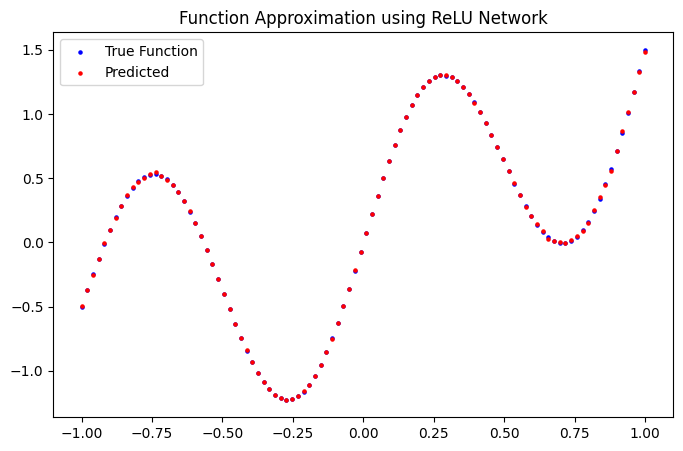

In [17]:
model.eval()
y_pred = model(x_test_tensor).detach().numpy()
mse = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse:.6f}")
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, label="True Function", color="blue", s=5)
plt.scatter(x_test, y_pred, label="Predicted", color="red", s=5)
plt.legend()
plt.title("Function Approximation using ReLU Network")
plt.show()